In [56]:
import pandas as pd

In [57]:
data=pd.read_csv(r'Downloads\ShortenedDelayFlight.csv')

In [58]:
data

,Unnamed: 0,ID,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,0,2008,1,3,4,1829,1755,1959,1925,...,3,10,0,N,0,2,0,0,0,32
1,1,1,2008,1,3,4,1937,1830,2037,1940,...,3,7,0,N,0,10,0,0,0,47
2,2,2,2008,1,3,4,1644,1510,1845,1725,...,6,8,0,N,0,8,0,0,0,72
3,3,3,2008,1,3,4,1452,1425,1640,1625,...,7,8,0,N,0,3,0,0,0,12
4,4,4,2008,1,3,4,1323,1255,1526,1510,...,4,9,0,N,0,0,0,0,0,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685729,685729,685729,2008,6,13,5,1609,1535,1942,1915,...,7,15,0,N,0,27,0,0,0,0
685730,685730,685730,2008,6,14,6,1616,1535,1954,1915,...,11,11,0,N,0,11,0,0,0,28
685731,685731,685731,2008,6,17,2,1617,1535,2002,1915,...,7,17,0,N,0,0,22,5,0,20
685732,685732,685732,2008,6,22,7,1607,1535,1941,1915,...,5,12,0,N,0,1,0,0,0,25


In [8]:
data.shape

(685734, 31)

In [9]:
import matplotlib.pyplot as plt

In [10]:
plt.scatter(data[TaxiIn])

NameError: name 'TaxiIn' is not defined

In [59]:
arrdelay

0           34
1           57
2           80
3           15
4           16
          ... 
674515     768
675597     758
676319     680
678348    1077
681689     932
Name: ArrDelay, Length: 916, dtype: int64

In [11]:
taxiin=data.iloc[:,21]
year=data.iloc[:,2]
month=data.iloc[:,3]

In [12]:
year

0         2008
1         2008
2         2008
3         2008
4         2008
          ... 
685729    2008
685730    2008
685731    2008
685732    2008
685733    2008
Name: Year, Length: 685734, dtype: int64

In [13]:
taxiin

0          3
1          3
2          6
3          7
4          4
          ..
685729     7
685730    11
685731     7
685732     5
685733     6
Name: TaxiIn, Length: 685734, dtype: int64

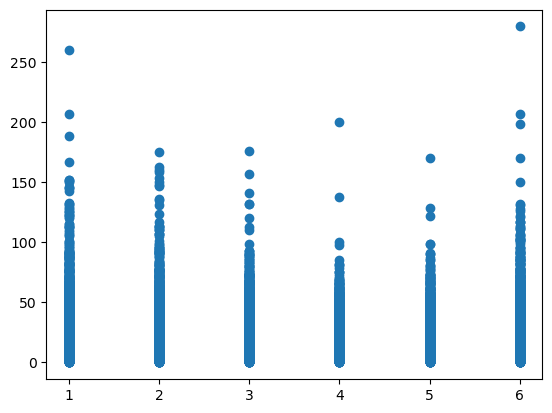

In [12]:
plt.scatter(month,taxiin)
plt.show()

In [14]:
import numpy as np

In [17]:
median=np.median(data.iloc[:,21])

In [18]:
median


6.0

In [27]:
threshold = 3
mode = data.iloc[:,21].mode()
median = data.iloc[:,21].median()
z_scores = (data.iloc[:,21] - median) / data.iloc[:,21].std()
data['taxiin'] = np.where(np.abs(z_scores) > threshold, mode, data.iloc[:,21])


In [28]:
data

,Unnamed: 0,ID,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,taxiin
0,0,0,2008,1,3,4,1829,1755,1959,1925,...,10,0,N,0,2,0,0,0,32,3
1,1,1,2008,1,3,4,1937,1830,2037,1940,...,7,0,N,0,10,0,0,0,47,3
2,2,2,2008,1,3,4,1644,1510,1845,1725,...,8,0,N,0,8,0,0,0,72,6
3,3,3,2008,1,3,4,1452,1425,1640,1625,...,8,0,N,0,3,0,0,0,12,7
4,4,4,2008,1,3,4,1323,1255,1526,1510,...,9,0,N,0,0,0,0,0,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685729,685729,685729,2008,6,13,5,1609,1535,1942,1915,...,15,0,N,0,27,0,0,0,0,7
685730,685730,685730,2008,6,14,6,1616,1535,1954,1915,...,11,0,N,0,11,0,0,0,28,11
685731,685731,685731,2008,6,17,2,1617,1535,2002,1915,...,17,0,N,0,0,22,5,0,20,7
685732,685732,685732,2008,6,22,7,1607,1535,1941,1915,...,12,0,N,0,1,0,0,0,25,5


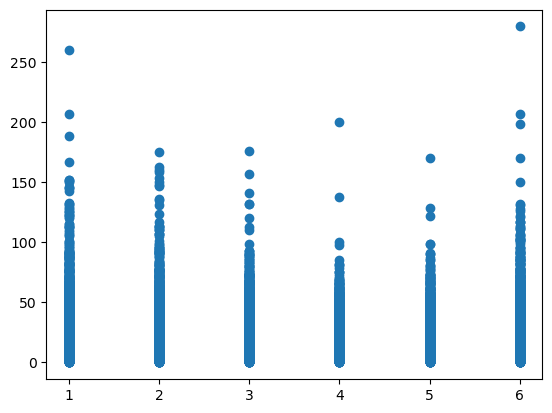

In [31]:
plt.scatter(month,taxiin)

In [55]:
arrdelay

0           34
1           57
2           80
3           15
4           16
          ... 
674515     768
675597     758
676319     680
678348    1077
681689     932
Name: ArrDelay, Length: 916, dtype: int64

In [30]:
plt.show()

KeyError: 'taxiin'

In [33]:
median = np.median(data.iloc[:,21])

# identify outliers using Z-score method
threshold = 3
z_scores = (data.iloc[:,21] - median) / data.iloc[:,21].std()
taxiin = np.where(np.abs(z_scores) > threshold, median, data.iloc[:,21])

In [34]:
taxiin


array([3., 3., 6., ..., 7., 5., 6.])

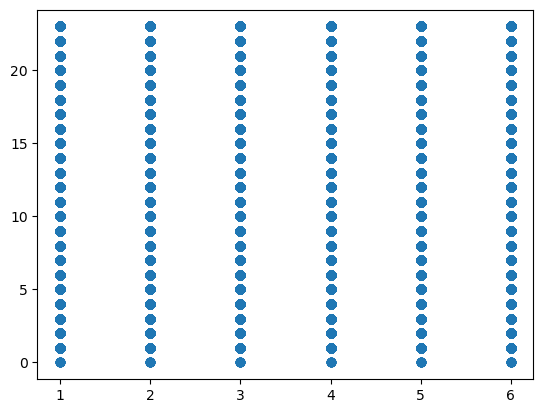

In [36]:
plt.scatter(month,taxiin)

In [37]:
plt.show()

In [38]:
data

,Unnamed: 0,ID,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,taxiin
0,0,0,2008,1,3,4,1829,1755,1959,1925,...,10,0,N,0,2,0,0,0,32,3
1,1,1,2008,1,3,4,1937,1830,2037,1940,...,7,0,N,0,10,0,0,0,47,3
2,2,2,2008,1,3,4,1644,1510,1845,1725,...,8,0,N,0,8,0,0,0,72,6
3,3,3,2008,1,3,4,1452,1425,1640,1625,...,8,0,N,0,3,0,0,0,12,7
4,4,4,2008,1,3,4,1323,1255,1526,1510,...,9,0,N,0,0,0,0,0,16,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685729,685729,685729,2008,6,13,5,1609,1535,1942,1915,...,15,0,N,0,27,0,0,0,0,7
685730,685730,685730,2008,6,14,6,1616,1535,1954,1915,...,11,0,N,0,11,0,0,0,28,11
685731,685731,685731,2008,6,17,2,1617,1535,2002,1915,...,17,0,N,0,0,22,5,0,20,7
685732,685732,685732,2008,6,22,7,1607,1535,1941,1915,...,12,0,N,0,1,0,0,0,25,5


In [39]:
data.columns

Index(['Unnamed: 0', 'ID', 'Year', 'Month', 'DayofMonth', 'DayOfWeek',
       'DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'UniqueCarrier',
       'FlightNum', 'TailNum', 'ActualElapsedTime', 'CRSElapsedTime',
       'AirTime', 'ArrDelay', 'DepDelay', 'Origin', 'Dest', 'Distance',
       'TaxiIn', 'TaxiOut', 'Cancelled', 'CancellationCode', 'Diverted',
       'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay',
       'LateAircraftDelay', 'taxiin'],
      dtype='object')

In [40]:
arrdelay=data.iloc[:,16]

In [ ]:
plt.scatter()